<a href="https://colab.research.google.com/github/Saadahm/Saadahm1/blob/main/Elastic_Net_Regression_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('NFLX.csv')

In [33]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02
mean,180.040778,187.655279,173.532019,180.929674,180.929674,8.734732e+07
std,162.861814,169.513468,157.218526,163.353438,163.353438,8.678611e+07
min,7.791429,8.262857,7.544286,7.701429,7.701429,3.123969e+06
25%,47.545714,49.742143,45.621429,47.712857,47.712857,3.264995e+07
50%,107.480003,115.419998,101.209999,108.379997,108.379997,6.049690e+07
75%,318.989990,336.199997,305.770005,325.039994,325.039994,1.139114e+08
max,567.979980,593.289978,543.000000,565.169983,565.169983,7.136955e+08


In [34]:
df['Date']=pd.to_datetime(df.Date)

In [35]:
df.shape

(523, 7)

In [36]:
df.drop('Adj Close',axis=1,inplace = True)

In [37]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2011-06-13,37.111427,37.571430,34.894287,35.095715,134741600
1,2011-06-20,34.551430,37.264286,34.302856,36.708572,133948500
2,2011-06-27,36.414288,38.391430,35.948570,38.284286,103798100
3,2011-07-04,39.428570,42.478573,39.387142,42.162857,143000200
4,2011-07-11,42.118572,43.541428,40.231430,40.990002,191842700


In [38]:
x=df[['Open','High','Low','Volume']]
y=df['Close']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [40]:
x_train.shape

(392, 4)

In [41]:
x_test.shape

(131, 4)

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=ElasticNet(alpha=1.0, l1_ratio=0.5)


In [44]:
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5084.445698048849, tolerance: 1073.7321510319678
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
print(regressor.coef_)

[-4.63482954e-01  8.10358859e-01  6.42229789e-01 -7.15804108e-09]


In [46]:
print(regressor.intercept_)

1.400045389342921


In [47]:
predicted=regressor.predict(x_test)

In [48]:
print(x_test)

           Open        High         Low     Volume
15    19.459999   19.697144   15.375714  427576800
78    12.285714   13.527143   12.057143  141852900
137   55.341431   58.914288   52.937141  147089600
264   95.199997  101.269997   93.180000   60429500
113   35.897144   37.684284   35.774284   95128600
..          ...         ...         ...        ...
71     9.194286   10.034286    8.200000  345716700
473  480.769989  555.880005  479.799988   46646700
6     40.081429   40.785713   35.922855  239626800
8     32.849998   35.407143   31.642857  135921800
319  188.690002  190.250000  179.380005   36074000

[131 rows x 4 columns]


In [49]:
predicted.shape

(131,)

In [50]:
dframe=pd.DataFrame(y_test,predicted)


In [51]:
dfr=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [52]:
print(dfr)

     Actual Price  Predicted Price
15      16.181429        15.156552
78      13.328571        13.395734
137     58.475716        56.436886
264     97.059998        98.751924
113     36.981430        37.594501
..            ...              ...
71       9.940000         8.061653
473    548.729980       536.841583
6       37.998569        37.229519
8       34.857143        34.216175
319    184.039993       183.061182

[131 rows x 2 columns]


In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [54]:
regressor.score(x_test,y_test)

0.9991175252068286

In [55]:
import math

In [56]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 3.076721636465964


In [57]:
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))

Mean Square Error: 21.422191773562325


In [60]:
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Root Mean Absolute Error: 1.7540586183095375


In [61]:
graph=dfr.head(30)

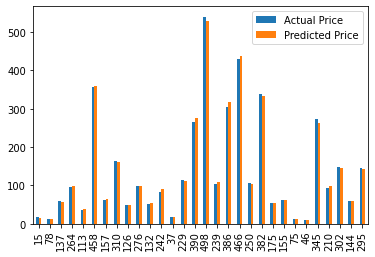

In [62]:
graph.plot(kind='bar')